# ~ PoC AI Pool 2025 ~
- ## Day 2: Understand Machine Learning
    - ### Module 1: Linear Regression
-----------

In [3]:
import random
import matplotlib.pyplot as plt

Welcome th the second day of your PoC AI Pool !

*We had to make sure everyone was up to speed on basic python (and ai-related python libs) knowledge before heading into the main topic of this Pool: **machine learning** !*

Yesterday, you learned some very useful skills which we'll put into practice in order to build our very first **machine learning project** :

- python
- numpy -> (to work with huge numbers and arrays)
- matplotlib -> (to display graphs and visualise data)
- pandas -> (to edit and analyse data)

Today we delve deeper into the theory by entering in the world of **machine learning**. This notebook introduce the concept of *Linear Regression* that are the simpliest function to train.

The problem you will encounter today is simply the multiplication by 2.
Here the theory to understand it better :

---
## 1.0 The theory

`Primary what is machine learning ?`

Imagine that you have a mathematical (polynomial) function like : 

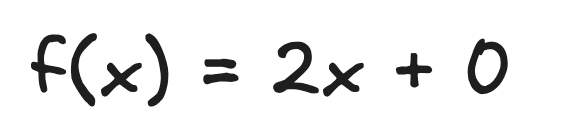

With an input of 1 or 3 the output will be :

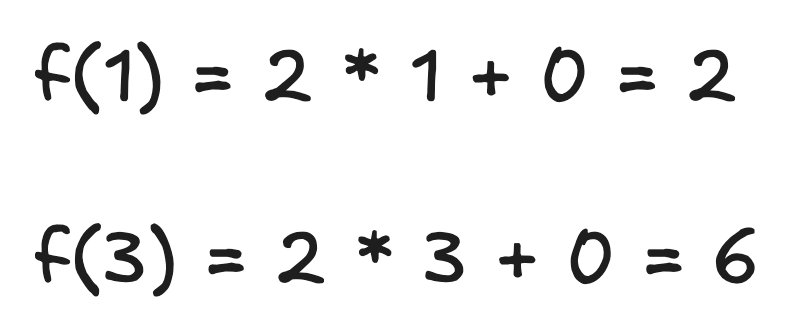

Like easy for now, but let's imagine another function called m :

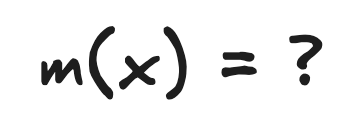

Strange we don't know the function inside, other wise we know that for an input of 1 and 3 the output will also be (like other example):

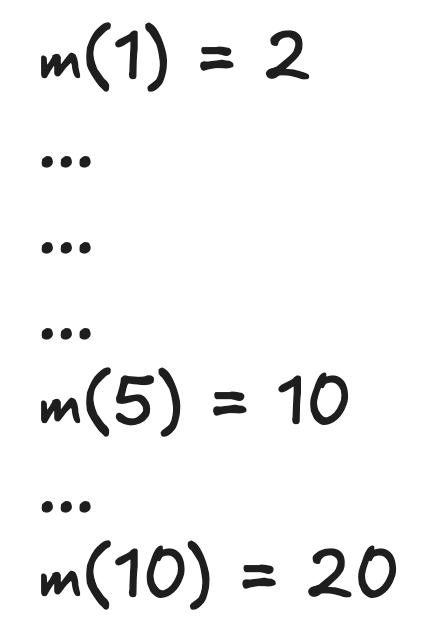

We can say that we have a dataset of input and output (all the example above) but we don't now the formula to transform `x`into `y` and that's were *machine learning come* !

So machine learning is the process to find an algorithm (here a simple function) that fit with all the data we give it in parameter

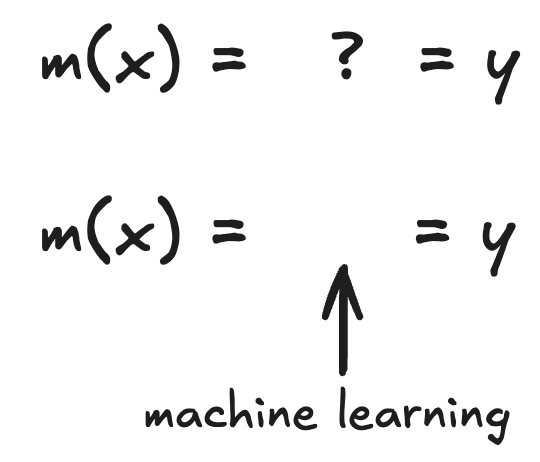

Many technics are possible in machine learning like the famous neural networks, the random forest, the k-nearest neighboors, and the most simple technique : the linear regression !

---
## 2.0 The Linear Regression

### Step 1: Understanding the Formula


the formula for linear regression is just the representation of a simple polynomial function like this : 

$$ f(x) = a \cdot x + b $$

But today, we’re not going to stick to the pure math version. Instead, we’ll look at its “machine learning transcription” (same idea but with different names) since we’re going to talk about neurons and all that jazz. Yeah, I know we’re not technically in neural networks yet, but hey, this formula works for a single neuron too! Here’s the breakdown:

A neuron is basically the simplest function in machine learning. With one input and one output, its formula looks like this:

$$ y = x \cdot w + b $$

Where:
-	 $ x $ is the input.
-	 $ w $ is the weight of the neuron.
-	 $ y $ is the output.
-    $ b $ is the bias of the neuron, which is just a value we add to the result.

If we had two inputs, the formula would expand to:

$$ y = x_1 \cdot w_1 + x_2 \cdot w_2 + b $$

The goal here is to modifie $ w $ and  $b$  so that our predicted output $( y_{\text{pred}} )$ matches the actual output $( y )$.

Alright, let’s get started by creating a dataset for our neuron to learn from!

In [1]:
# Task: Create the training set
train_set = [
    [0, 0],
    [1, 2],
    [2, 4],
    [3, 6],
    [4, 8],
    [5, 10]
]
print("Training Set:", train_set)

Training Set: [[0, 0], [1, 2], [2, 4], [3, 6], [4, 8], [5, 10]]


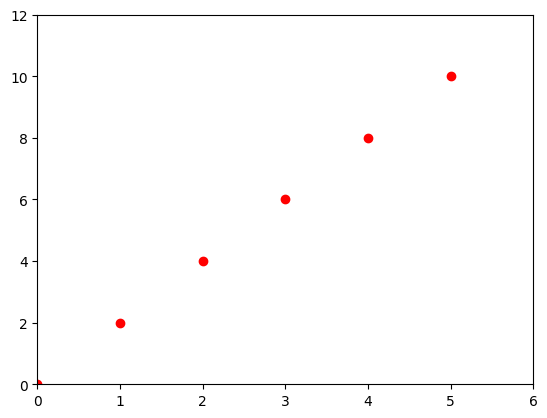

In [4]:
# Task: Visualize the training set

x = [i[0] for i in train_set]
y = [i[1] for i in train_set]

plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 12])
plt.show()

### Step 2: Initialize the Weight and Bias

We need to initialize both `w` and `b` with random values beetwen 0 and 10 at the start :  

In [15]:
random.seed(0)


mini = 0
maxi = 10

#TODO: randomise the weight and bias beetwen 0 and 10
w = random.uniform(mini, maxi)
b = random.uniform(mini, maxi)

print("Initial Weight:", w)
print("Initial Bias:", b)

assert w > 8.44 and w < 8.45, "Weight is not correct"
assert b > 7.57 and b < 7.58, "Bias is not correct"

Initial Weight: 8.444218515250482
Initial Bias: 7.579544029403024


### step 3 : Make prediction using the neuron formula

With the formula of above, calculate the `y_pred` of each input `x` in the train_set in a function call **forward** 


In [16]:
#TODO : Define the forward function -> neuron function
def forward(x):
    return w * x + b

#TODO: Test the forward function
for x, y in train_set:
    y_pred = forward(x)
    print("Prediction:", y_pred, "Actual:", y)

assert forward(0) > 7.57 and forward(0) < 7.58, "Test Failed"

Prediction: 7.579544029403024 Actual: 0
Prediction: 16.023762544653508 Actual: 2
Prediction: 24.467981059903988 Actual: 4
Prediction: 32.91219957515447 Actual: 6
Prediction: 41.35641809040495 Actual: 8
Prediction: 49.800636605655434 Actual: 10


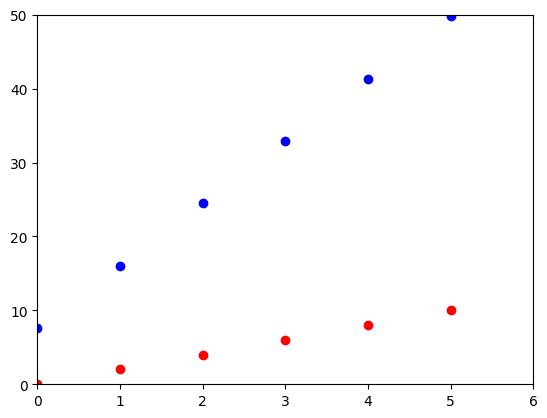

In [17]:
# graph of the prediction and the actual data
x = [i[0] for i in train_set]
y = [i[1] for i in train_set]
y_pred = [forward(i) for i in x]

plt.plot(x, y, 'ro')
plt.plot(x, y_pred, 'bo')
plt.axis([0, 6, 0, 50])
plt.show()

As you can see, there is a significant difference between the prediction and the result, which we refer to as the error.  To measure this error, we use something called a loss function. The main goal is to minimize the loss function as much as possible, ideally getting it as close to zero as we can.

One common way to calculate this error is by using the Mean Squared Error (MSE). First, we measure how far the prediction is from the actual output using this formula:

$$ \text{Error} = y - y_{\text{pred}} $$

Then, we square this error to make sure it’s always positive:

$$ \text{Error Squared} = (y - y_{\text{pred}})^2 $$

Finally, we sum up all these squared errors across the dataset and take the average to get the Mean Squared Error (MSE), which is one of the most popular loss functions out there:

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - y_{\text{pred},i})^2 $$

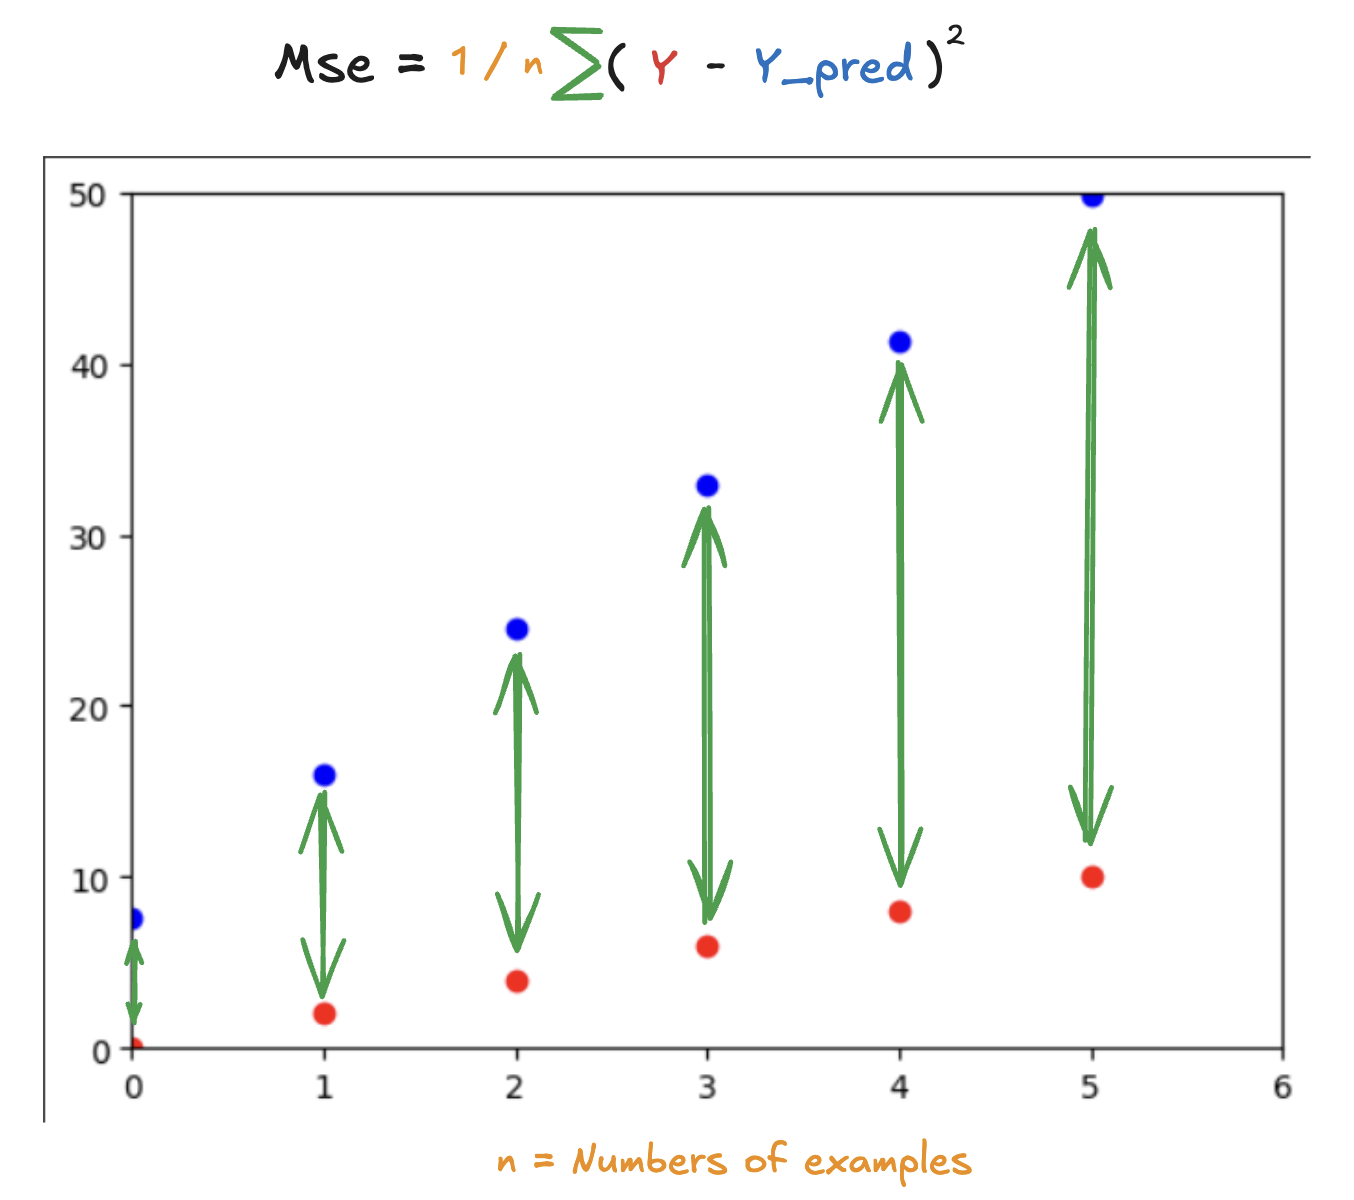

*You only need to set up a squared error since we’re learning example by example, so there’s no need to sum anything! But hey, as a bonus, you could try implementing it in a **mean_squared_error** function :)*

In [19]:
#TODO: Define the loss function
def squared_error(y, y_pred):
    return (y - y_pred)**2

#TODO: Test the Squared loss function
for x, y in train_set:
    y_pred = forward(x)
    error = squared_error(y, y_pred)
    print("Error:", error)

Error: 57.44948769365903
Error: 196.66591590882663
Error: 418.93824866858836
Error: 724.2664859729443
Error: 1112.6506278218947
Error: 1584.0906742154393


### step 6 : Calcule the derivative 

After get this loss we need to reduce it near 0 ! To move from just measuring the error to actually reducing it, we need to figure out in which direction (+ or -) and by how much change our parameters `w`and `b`. This is when derivatives (the slope of your loss function) come in !

Why Derivatives?

•	A derivative tells us how fast the loss changes as we vary a parameter.

•	If the derivative is large and positive, it means the loss will decrease if we move the parameter in the negative direction.

•	If the derivative is large and negative, it means the loss will decrease if we move the parameter in the positive direction.

For a single data point (x, y), the derivative of w is:


Derivative for `w`

$$
\frac{\partial L}{\partial w}
= 2 x \bigl(y - ypred\bigr).
$$

Derivative for `b`

$$
\frac{\partial L}{\partial b} = 2 \bigl(y - ypred\bigr).
$$

*Bonus : To better understand and apply the derivative of the function MSE with the linear regression, try calculating it manually and use the principe of [chain rule](https://www.youtube.com/watch?v=NO3AqAaAE6o) ! :)*

chain rule : 

$$ 
\frac{\partial L}{\partial w} = \frac{\partial L}{\partial y_{\text{pred}}} \cdot \frac{\partial y_{\text{pred}}}{\partial w}.
$$

In [21]:
#TODO : setup the derivative of the loss function
def derivative_w(x, y, y_pred):
    return 2*x*(y_pred - y)

def derivative_b(y, y_pred):
	return 2*(y_pred - y)

def derivative(x, y, y_pred):
    return (derivative_w(x, y, y_pred), derivative_b(y, y_pred))


# Print the result of the derivative
for x, y in train_set:
    y_pred = forward(x)
    derivative_weight, derivative_bias = derivative_w(x, y, y_pred), derivative_b(y, y_pred)

    print(f"x: {x} ; y: {y} -> y_pred: {y_pred:.3f} | Derivative Weight: {derivative_weight:.3f} | Derivative Bias: {derivative_bias:.3f}")
    # save the derivatives for after
    dw_values = [derivative_w(x, y, forward(x)) for x, y in train_set]
    db_values = [derivative_b(y, forward(x)) for x, y in train_set]

x: 0 ; y: 0 -> y_pred: 7.580 | Derivative Weight: 0.000 | Derivative Bias: 15.159
x: 1 ; y: 2 -> y_pred: 16.024 | Derivative Weight: 28.048 | Derivative Bias: 28.048
x: 2 ; y: 4 -> y_pred: 24.468 | Derivative Weight: 81.872 | Derivative Bias: 40.936
x: 3 ; y: 6 -> y_pred: 32.912 | Derivative Weight: 161.473 | Derivative Bias: 53.824
x: 4 ; y: 8 -> y_pred: 41.356 | Derivative Weight: 266.851 | Derivative Bias: 66.713
x: 5 ; y: 10 -> y_pred: 49.801 | Derivative Weight: 398.006 | Derivative Bias: 79.601


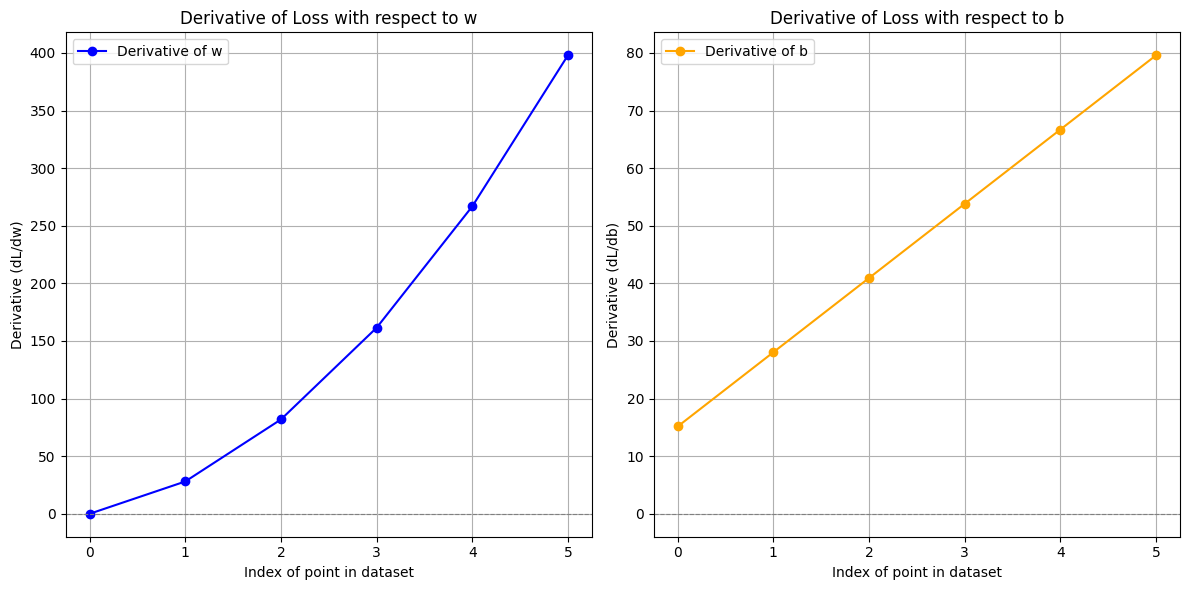

In [22]:
plt.figure(figsize=(12, 6))

# Plot derivative of w
plt.subplot(1, 2, 1)
plt.plot(range(len(dw_values)), dw_values, marker='o', color='blue', label="Derivative of w")
plt.title("Derivative of Loss with respect to w")
plt.xlabel("Index of point in dataset")
plt.ylabel("Derivative (dL/dw)")
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)

# Plot derivative of b
plt.subplot(1, 2, 2)
plt.plot(range(len(db_values)), db_values, marker='o', color='orange', label="Derivative of b")
plt.title("Derivative of Loss with respect to b")
plt.xlabel("Index of point in dataset")
plt.ylabel("Derivative (dL/db)")
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



As you can see, the larger the error, the larger the gradient will be. This is because the gradient measures how much the weights and biases should change to reduce the error. During training, this gradient is applied. What this means is that at every iteration, the gradient is used to update the corresponding values (weights and biases) so the function can learn and improve.

This process is called gradient descent. It is the step where we adjust the weights and biases based on the gradient using the following formula:

$$
w = w - \eta \cdot \frac{\partial L}{\partial w}
$$

$$
b = b - \eta \cdot \frac{\partial L}{\partial b}
$$

Here:

•	￼ $ w $ $ b $  is the weight, and is the bias.

•	￼ $ \eta $ is the learning rate, a parameter that controls how large each update step will be.

•	￼ $ \frac{\partial L}{\partial w} $ and $ \frac{\partial L}{\partial b} $ are the gradients of the loss function with respect to the weight and bias.


If the gradient is negative, the weight increases ; if the gradient is positive, the weight decreases. This helps reduce the loss over time.

We don't add all the gradient to the weight, as you can see he his to big to reach the '2' value. To counter this problem, we only add a percentage of the gradient, and this percentage is choose by the learning rate.

The learning rate plays a crucial role in how the model learns:
	•	A large learning rate makes the updates bigger, but the model might “overshoot” the optimal values and never fully converge to a solution.
	•	A small learning rate makes the updates smaller, which helps the model converge more precisely but takes a lot longer to reach the optimal solution.

Choosing the right learning rate is critical. Too large, and the model might not learn properly; too small, and training might take too long, **choose carefully !**.

In [57]:
#TODO: Update the weight and bias
LEARNING_RATE = 0.01

w -= derivative_weight * LEARNING_RATE
b -= derivative_bias * LEARNING_RATE

print("Updated Weight:", w)
print("Updated Bias:", b)

for x, y in train_set:
    y_pred = forward(x)
    derivative_weight, derivative_bias = derivative(x, y, y_pred)
    print(f"x: {x} ; y: {y} -> y_pred: {y_pred:.3f} | Derivative Weight: {derivative_weight:.3f} | Derivative Bias: {derivative_bias:.3f}")
    # Plot the derivatives
    dw_values = [derivative_w(x, y, forward(x)) for x, y in train_set]
    db_values = [derivative_b(y, forward(x)) for x, y in train_set]

Updated Weight: 5.321883417442745
Updated Bias: 4.091168615255476
x: 0 ; y: 0 -> y_pred: 4.091 | Derivative Weight: 0.000 | Derivative Bias: 8.182
x: 1 ; y: 2 -> y_pred: 9.413 | Derivative Weight: 14.826 | Derivative Bias: 14.826
x: 2 ; y: 4 -> y_pred: 14.735 | Derivative Weight: 42.940 | Derivative Bias: 21.470
x: 3 ; y: 6 -> y_pred: 20.057 | Derivative Weight: 84.341 | Derivative Bias: 28.114
x: 4 ; y: 8 -> y_pred: 25.379 | Derivative Weight: 139.030 | Derivative Bias: 34.757
x: 5 ; y: 10 -> y_pred: 30.701 | Derivative Weight: 207.006 | Derivative Bias: 41.401


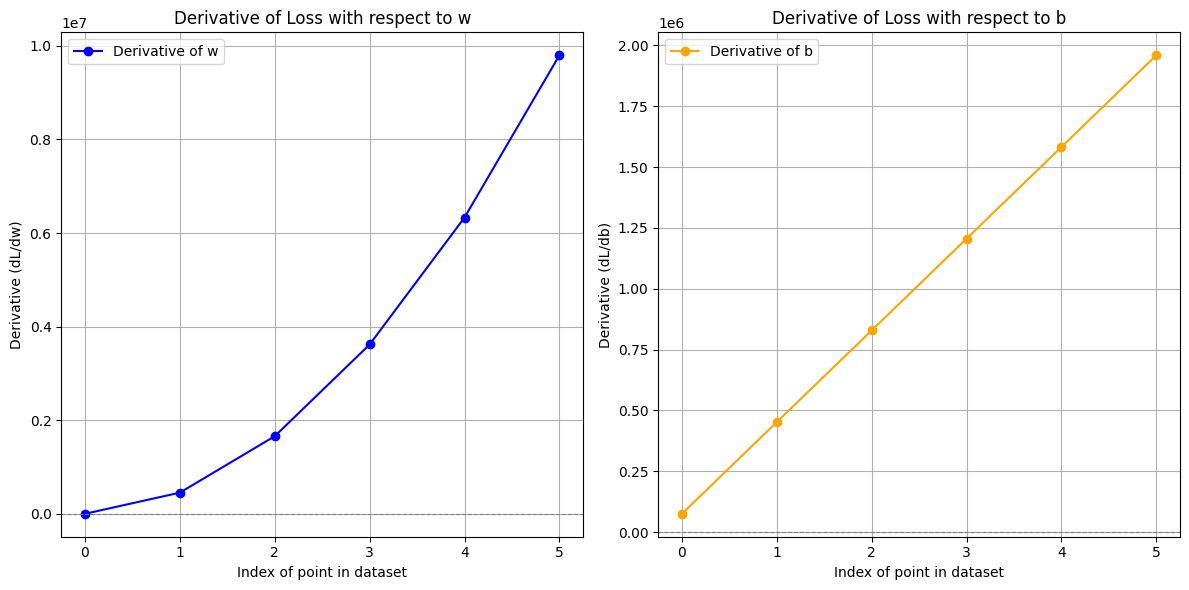

In [36]:
plt.figure(figsize=(12, 6))

# Plot derivative of w
plt.subplot(1, 2, 1)
plt.plot(range(len(dw_values)), dw_values, marker='o', color='blue', label="Derivative of w")
plt.title("Derivative of Loss with respect to w")
plt.xlabel("Index of point in dataset")
plt.ylabel("Derivative (dL/dw)")
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)

# Plot derivative of b
plt.subplot(1, 2, 2)
plt.plot(range(len(db_values)), db_values, marker='o', color='orange', label="Derivative of b")
plt.title("Derivative of Loss with respect to b")
plt.xlabel("Index of point in dataset")
plt.ylabel("Derivative (dL/db)")
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [58]:
# OPTIONNAL BUT RECOMMENDED : if you want reload the weight randomly at the first value 

w = random.uniform(mini, maxi)
b = random.uniform(mini, maxi)

As you can see, the model is learning effectively because the gradients are decreasing. Now, we need to repeat this process for a certain number of epochs *(basically, going through the entire dataset multiple times to give the function more opportunities to learn)*.

Try your best to implement the train function alone ! if you don't find the solution you can check just below this cell, there is a description of what is inside the train function, *good luck !* 

In [59]:
#TODO: Train the model

epochs = 100
learning_rate = LEARNING_RATE


for epoch in range(epochs) :
	for x, y in train_set :
		y_pred = forward(x)
		loss = squared_error(y, y_pred)
		derivative_weight, derivative_bias = derivative(x, y, y_pred)
		w -= derivative_weight * learning_rate
		b -= derivative_bias * learning_rate
	print(f"Epoch: {epoch}, Loss: {loss:.5f}")

print("Final Weight:", w)
print("Final Bias:", b)

Epoch: 0, Loss: 213.94247
Epoch: 1, Loss: 8.69146
Epoch: 2, Loss: 0.12890
Epoch: 3, Loss: 0.04272
Epoch: 4, Loss: 0.10385
Epoch: 5, Loss: 0.11424
Epoch: 6, Loss: 0.11013
Epoch: 7, Loss: 0.10317
Epoch: 8, Loss: 0.09603
Epoch: 9, Loss: 0.08924
Epoch: 10, Loss: 0.08291
Epoch: 11, Loss: 0.07702
Epoch: 12, Loss: 0.07154
Epoch: 13, Loss: 0.06646
Epoch: 14, Loss: 0.06173
Epoch: 15, Loss: 0.05735
Epoch: 16, Loss: 0.05327
Epoch: 17, Loss: 0.04948
Epoch: 18, Loss: 0.04597
Epoch: 19, Loss: 0.04270
Epoch: 20, Loss: 0.03966
Epoch: 21, Loss: 0.03684
Epoch: 22, Loss: 0.03423
Epoch: 23, Loss: 0.03179
Epoch: 24, Loss: 0.02953
Epoch: 25, Loss: 0.02743
Epoch: 26, Loss: 0.02548
Epoch: 27, Loss: 0.02367
Epoch: 28, Loss: 0.02199
Epoch: 29, Loss: 0.02043
Epoch: 30, Loss: 0.01897
Epoch: 31, Loss: 0.01763
Epoch: 32, Loss: 0.01637
Epoch: 33, Loss: 0.01521
Epoch: 34, Loss: 0.01413
Epoch: 35, Loss: 0.01312
Epoch: 36, Loss: 0.01219
Epoch: 37, Loss: 0.01132
Epoch: 38, Loss: 0.01052
Epoch: 39, Loss: 0.00977
Epoch: 4

Your goal above is to create the function that will train your function ! A little help of what are the step :
- Define `Hyperparameters` (epochs and lr)
- Iterate to your `epochs` and for each epoch to your `train_set`
- apply a `forward` function to get a `y_pred`
- calculate the `squared error` 
- calculate the `derivative`
- apply this derivative to the parameters

Well done you create your first machine learning function ! you can test is on many example you want by simple run the forward pass :)

In [60]:
x = 3
print ("Prediction ", forward(x))

Prediction  6.008031932395145


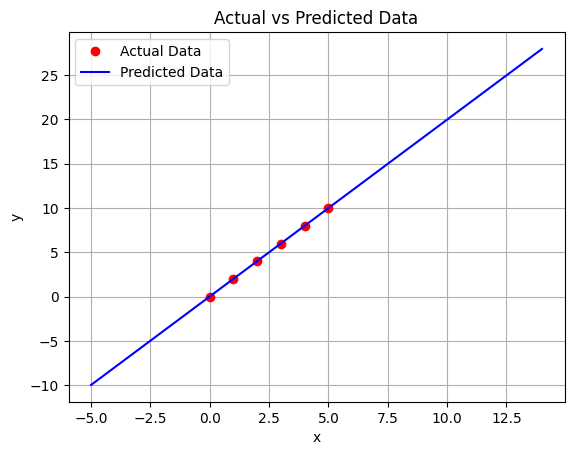

In [61]:
# Plot the result from -10 to 15 with the actual data
x_range = list(range(-5, 15))
y_pred_range = [forward(x) for x in x_range]

# Actual data points
x_actual = [i[0] for i in train_set]
y_actual = [i[1] for i in train_set]

plt.plot(x_actual, y_actual, 'ro', label='Actual Data')
plt.plot(x_range, y_pred_range, 'b-', label='Predicted Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Actual vs Predicted Data')
plt.grid(True)
plt.show()

---
Congratulations on building your very first machine learning algorithm !! I bet you were itching to dive straight into AI, and here you are, well done, now let's discover another fundametals of machine learning, [logistic regression](<logistic_regression.ipynb>)